In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('populations.txt', 
                 sep='\t', 
                 names=['year', 'hare', 'lynx', 'carrot'], 
                 comment='#',
                 dtype={'year': int, 'hare': int, 'lynx': int, 'carrot': int})

In [28]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

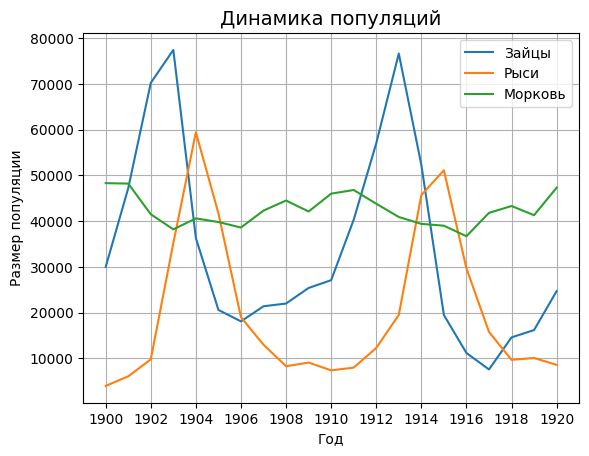

In [29]:
plt.plot(df['year'], df['hare'], label='Зайцы')
plt.plot(df['year'], df['lynx'], label='Рыси')
plt.plot(df['year'], df['carrot'], label='Морковь')

plt.title('Динамика популяций', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Размер популяции')
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2)) 
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  

In [30]:
print(f'mean (средние) значения: \n{df[["hare", "lynx", "carrot"]].mean()}\n')
print(f'std (стандартная девиация): \n{df[["hare", "lynx", "carrot"]].std()}')

mean (средние) значения: 
hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64

std (стандартная девиация): 
hare      21413.981859
lynx      16655.999920
carrot     3404.555771
dtype: float64


In [31]:
print("Годы максимальных популяций:")
for species in ['hare', 'lynx', 'carrot']:
    max_year = df.loc[df[species].idxmax(), 'year']
    max_value = df[species].max()
    print(f"{species}\t{max_year} (популяция: {max_value:.0f})")

Годы максимальных популяций:
hare	1903 (популяция: 77400)
lynx	1904 (популяция: 59400)
carrot	1900 (популяция: 48300)


In [32]:
species = np.array(['H', 'L', 'C'])
populations = df[['hare', 'lynx', 'carrot']].values
dominant_species = species[populations.argmax(axis=1)]
print("Доминирующие виды по годам:")
for year, species in zip(df['year'], dominant_species):
    print(f"{year}\t {species}")

Доминирующие виды по годам:
1900	 C
1901	 C
1902	 H
1903	 H
1904	 L
1905	 L
1906	 C
1907	 C
1908	 C
1909	 C
1910	 C
1911	 C
1912	 H
1913	 H
1914	 H
1915	 L
1916	 C
1917	 C
1918	 C
1919	 C
1920	 C


In [33]:
high_pop_years = df[np.any(df[['hare', 'lynx', 'carrot']] > 50000, axis=1)]['year']
print("Годы с популяцией более 50000:")
print(high_pop_years.values)

Годы с популяцией более 50000:
[1902 1903 1904 1912 1913 1914 1915]


In [34]:
print("Топ 2 года с минимальной популяцией:")
for species in ['hare', 'lynx', 'carrot']:
    years = df.nsmallest(2, species)[['year', species]]
    print(f"{species}:")
    print(years)

Топ 2 года с минимальной популяцией:
hare:
    year   hare
17  1917   7600
16  1916  11200
lynx:
   year  lynx
0  1900  4000
1  1901  6100
carrot:
    year  carrot
16  1916   36700
3   1903   38200


Корреляция между изменениями популяций зайцев и рысей: -0.051


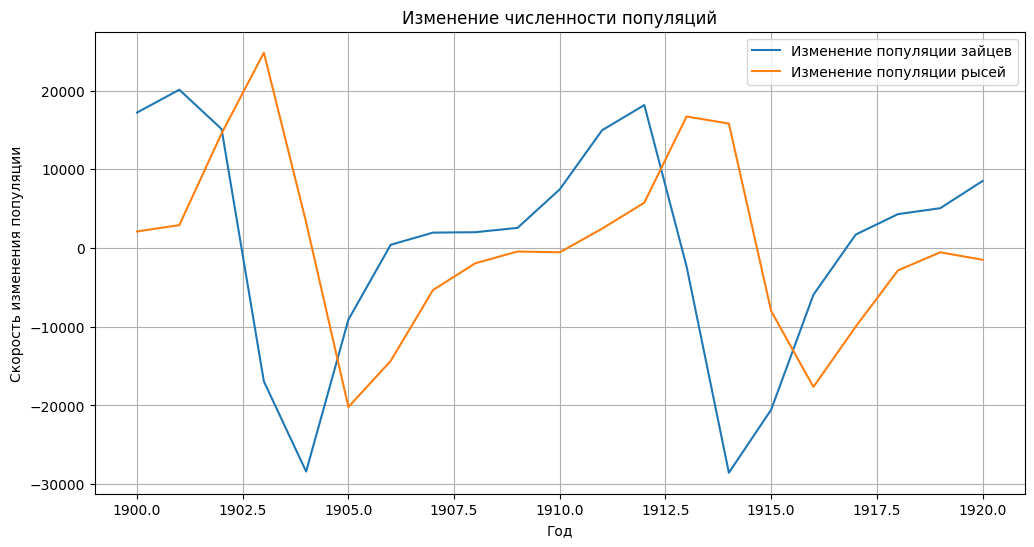

In [35]:
plt.figure(figsize=(12, 6))

hare_gradient = np.gradient(df['hare'])
lynx_gradient = np.gradient(df['lynx'])

plt.plot(df['year'], hare_gradient, label='Изменение популяции зайцев')
plt.plot(df['year'], lynx_gradient, label='Изменение популяции рысей')

plt.title('Изменение численности популяций')
plt.xlabel('Год')
plt.ylabel('Скорость изменения популяции')
plt.grid(True)
plt.legend()

correlation = np.corrcoef(hare_gradient, lynx_gradient)[0,1]
print(f"Корреляция между изменениями популяций зайцев и рысей: {correlation:.3f}")